# Scholastic Case Study

### Goal: Modeling
- Use binary classification to predict DC schools
    - Definition: Subscription rates dropped 50% or more between 2017 and 2019
- Examine metrics and feature importance

### Resources
Scholastic Red = #e40404

### Setup

In [161]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [162]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [163]:
# Plotting specs
matplotlib.rcParams['figure.figsize'] = 12, 8
plt.rcParams['figure.dpi'] = 300
sns.set()

In [164]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [165]:
selected_features = pd.read_csv('Data/selected_features.csv', index_col=0)

In [167]:
selected_features.head()

,enrollment,hhi,bookclub_rev_delta,revenue_ed_group_delta,teacher_count_delta,grd_3,grd_4,b_pct_aa,class
0,0.157210,0.159713,0.001022,0.001341,6.797284e-18,0.60,0.45,0.02,1.0
1,0.226636,0.131550,0.000856,0.001341,7.552538e-18,0.00,0.00,0.02,1.0
2,0.233979,0.127436,0.001405,0.001341,1.480297e-16,0.39,0.35,0.50,0.0
3,0.203939,0.103899,0.000615,0.001341,1.762259e-18,0.27,0.37,0.00,1.0
4,0.084446,0.080696,0.001466,0.001341,5.286776e-18,0.02,0.23,0.71,0.0


In [169]:
# No nulls
selected_features.isnull().sum().sum()

0

## Data Split

In [171]:
target = selected_features.pop('class')

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
									selected_features, target,
								test_size=0.2, random_state=0)

In [173]:
models = [LogisticRegression(), SVC(), LinearSVC(), GaussianNB(),
	RandomForestClassifier(), KNeighborsClassifier()]

In [174]:
acc, f1, precision, recall = [], [], [], []

In [175]:
for model in models:
	name = str(model)
	model = model.fit(X_train, y_train)
	preds = model.predict(X_test)
	
	acc_temp, f1_temp, precision_temp, recall_temp = \
	accuracy_score(preds, y_test), f1_score(preds, y_test), \
	precision_score(preds, y_test), recall_score(preds, y_test)
	
	acc.append(acc_temp)
	f1.append(f1_temp)
	precision.append(precision_temp)
	recall.append(recall_temp)
	
print('All models scored')

All models scored


In [176]:
model_results = DataFrame({'model': models, 'accuracy': acc,
							'f1': f1, 'precision': precision, 'recall': recall})

In [177]:
model_results

,model,accuracy,f1,precision,recall
0,LogisticRegression(),0.773295,0.872156,1.000000,0.773295
1,SVC(),0.773295,0.872156,1.000000,0.773295
2,LinearSVC(),0.773295,0.872156,1.000000,0.773295
3,GaussianNB(),0.770796,0.870146,0.993075,0.774298
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.770439,0.869970,0.993075,0.774019
5,KNeighborsClassifier(),0.733310,0.843560,0.929825,0.771943


## Feature Importance in Logistic Regression Model

In [178]:
model = LogisticRegression()

In [179]:
model.fit(X_train, y_train)

LogisticRegression()

In [180]:
feat_imp = DataFrame({'Feature': selected_features.columns, 'Importance': model.coef_.flatten(),
					  'Importance (Abs)':abs(model.coef_.flatten())})
feat_imp = feat_imp.sort_values(by='Importance (Abs)', ascending=False)
feat_imp

,Feature,Importance,Importance (Abs)
4,teacher_count_delta,-1.061356,1.061356
0,enrollment,-0.913722,0.913722
2,bookclub_rev_delta,-0.743862,0.743862
1,hhi,0.672386,0.672386
3,revenue_ed_group_delta,-0.656380,0.656380
7,b_pct_aa,-0.414343,0.414343
6,grd_4,-0.050805,0.050805
5,grd_3,-0.038584,0.038584


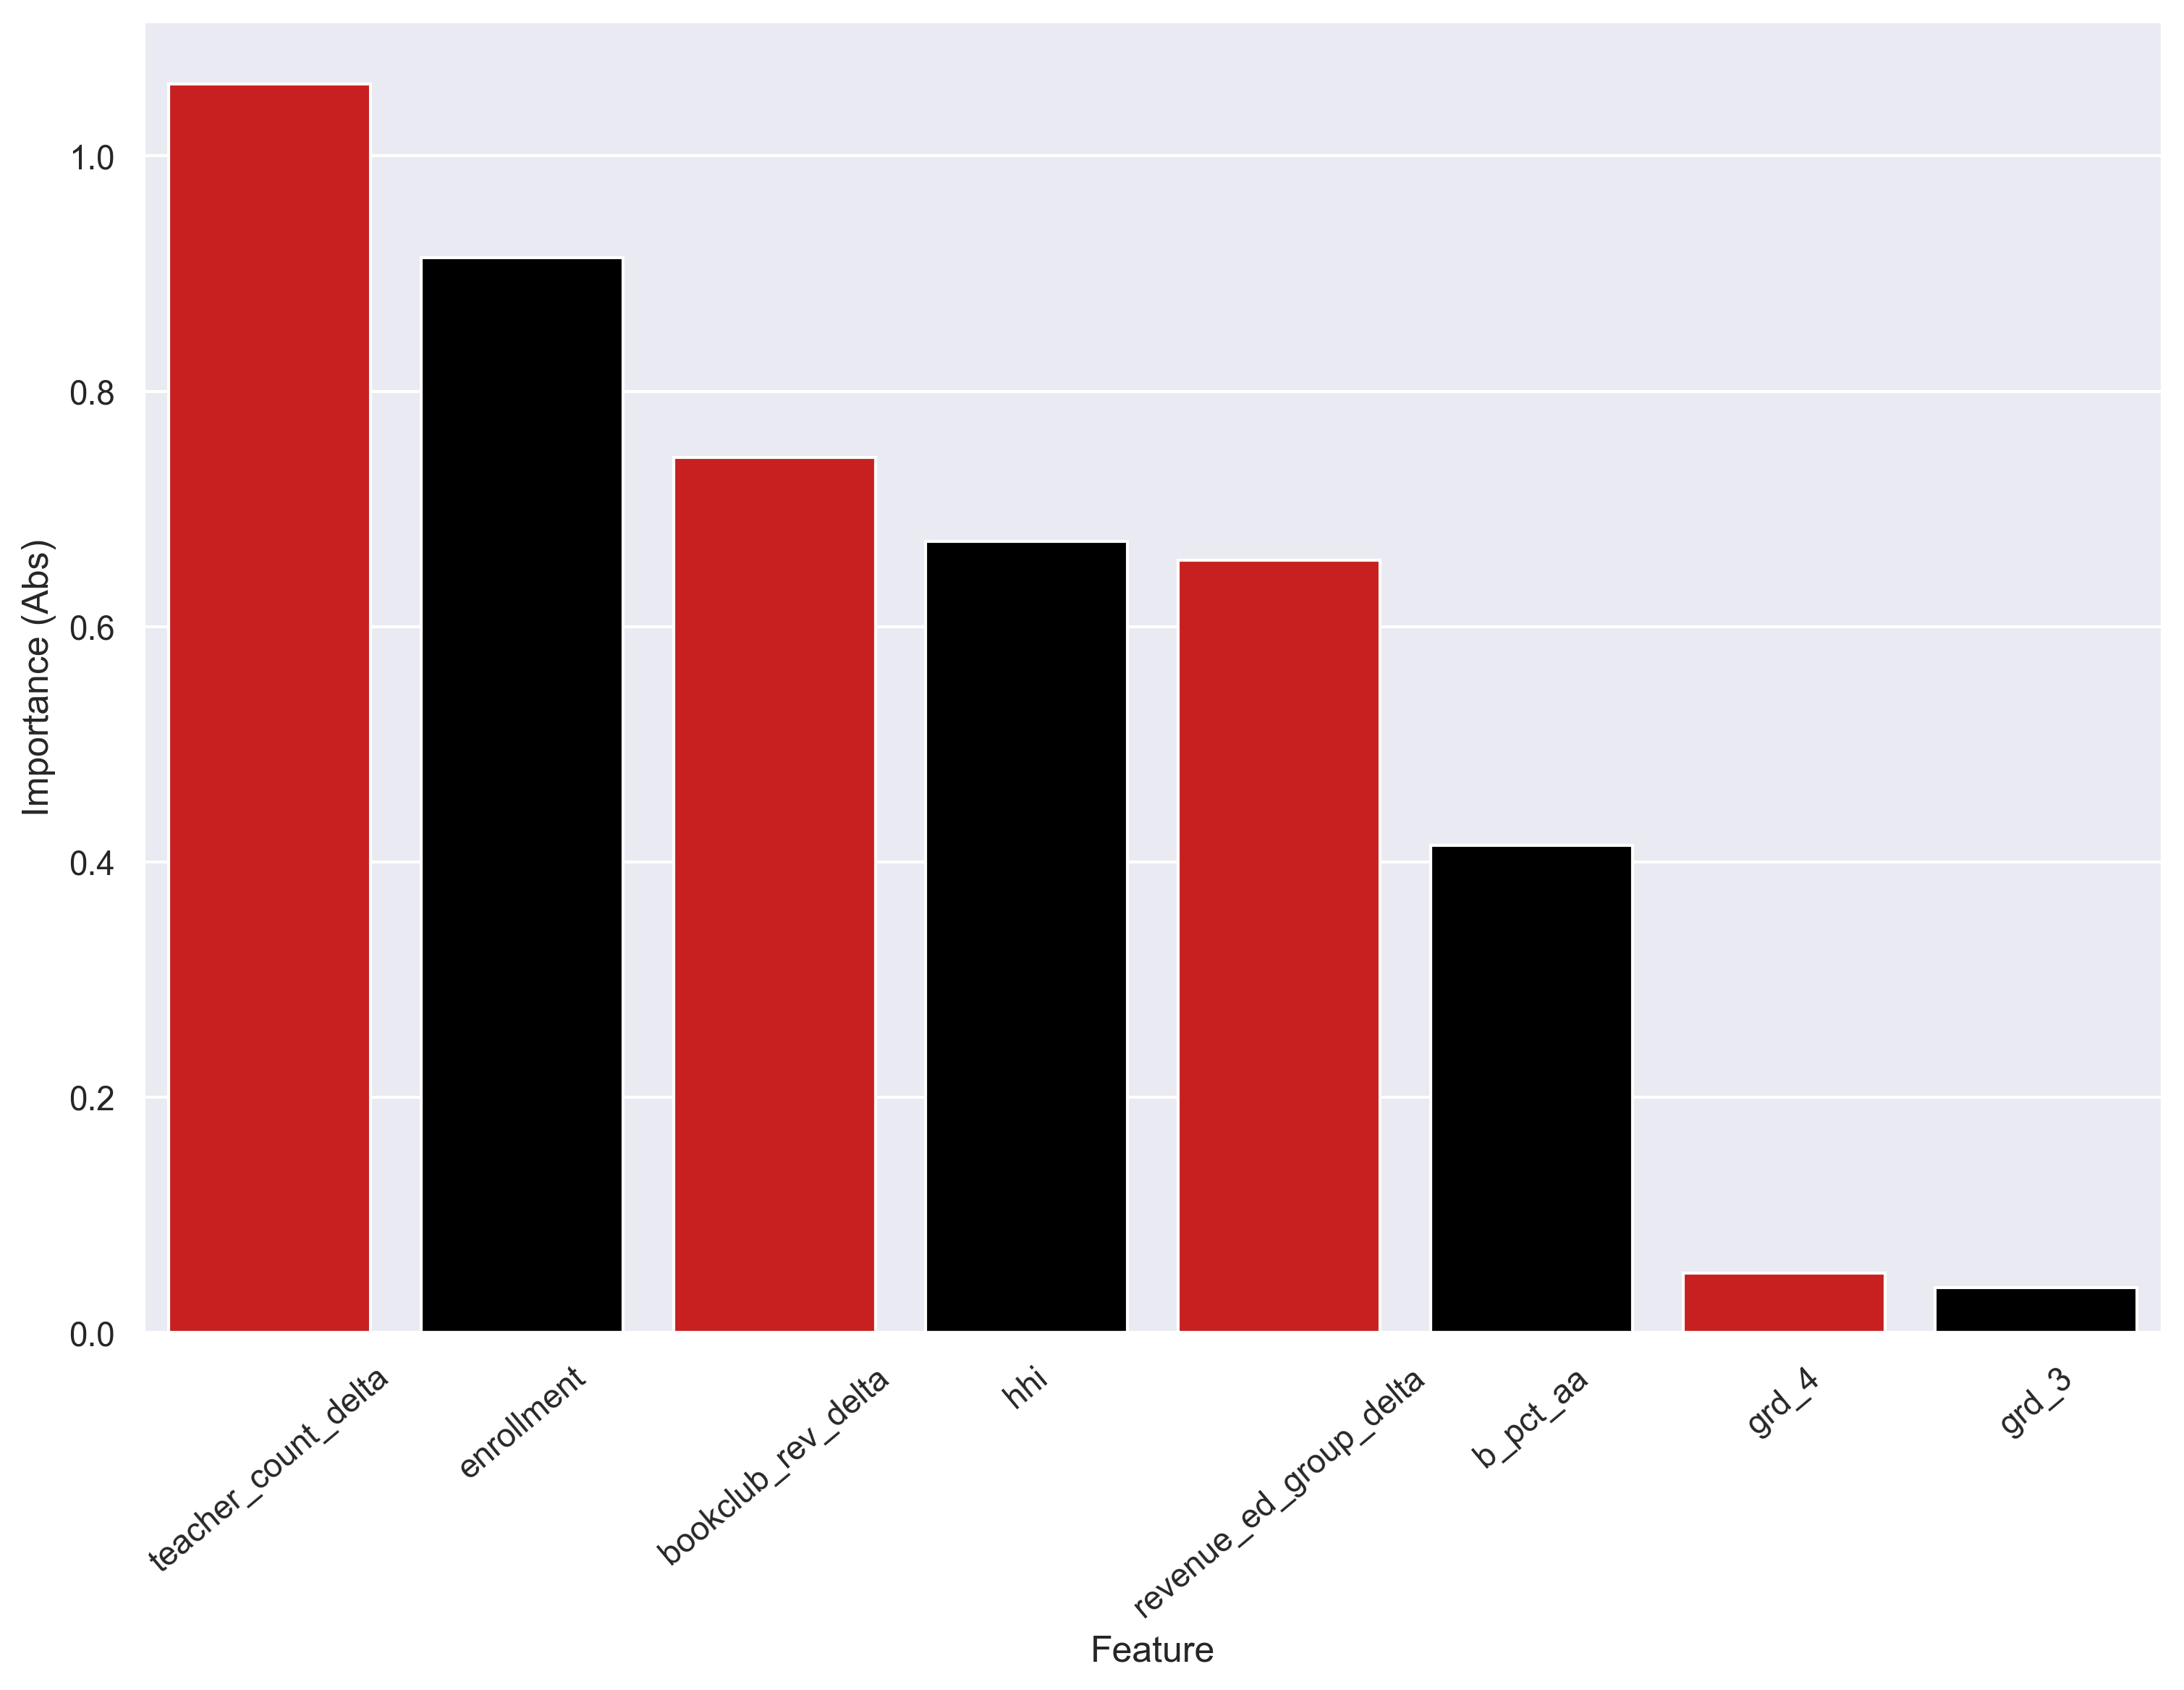

In [181]:
plt.xticks(rotation=40)
features = sns.barplot(data=feat_imp, x='Feature',
					   y='Importance (Abs)', palette=['#e40404', 'black'])